   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

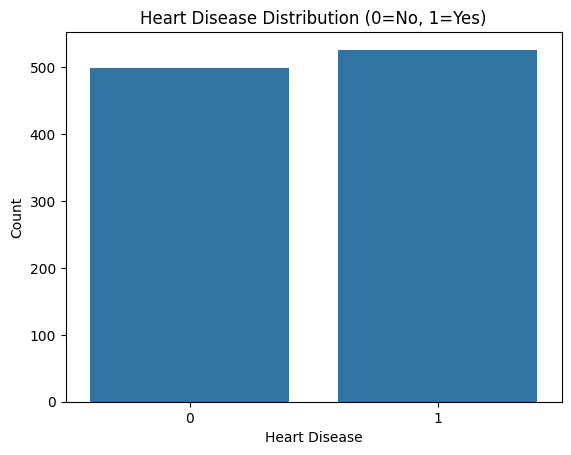

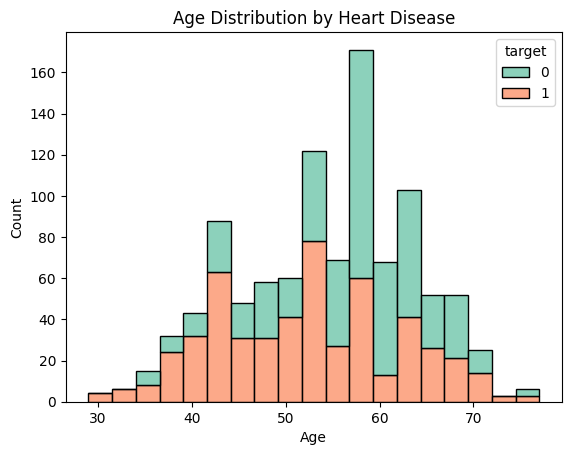

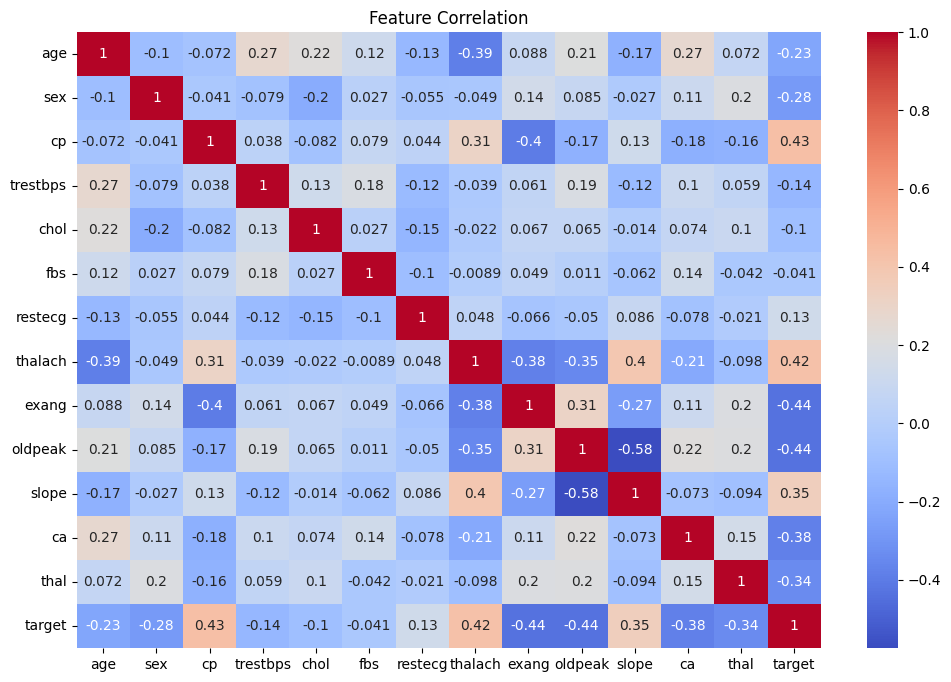

Selected Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


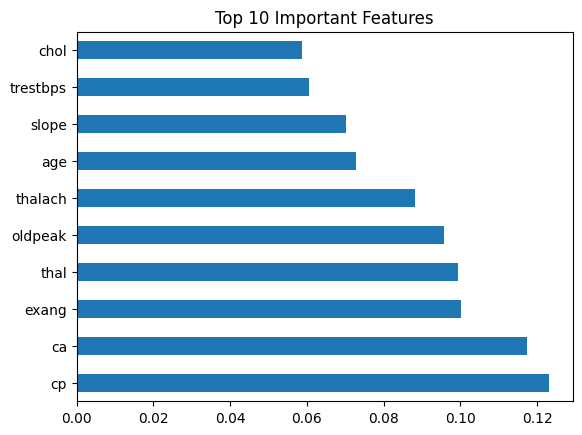

Model Accuracy Comparison:

Random Forest        Accuracy: 0.9854
Logistic Regression  Accuracy: 0.7659
SVM                  Accuracy: 0.8537
Decision Tree        Accuracy: 0.9854
K-Nearest Neighbors  Accuracy: 0.8195
Naive Bayes          Accuracy: 0.7854

Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy Score: 0.9853658536585366
Cross-validation Accuracy (mean): 0.9941463414634146


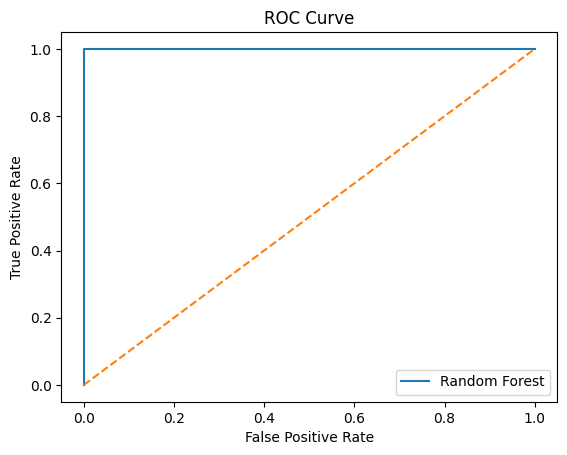

AUC Score: 1.0


In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Uncomment if you have xgboost installed
# from xgboost import XGBClassifier

# 2. Load Dataset
df = pd.read_csv("/content/heart.csv")  # Update path if needed

# 3. Basic Info and Preview
print(df.head())
print(df.info())
print(df.describe())

# 4. Visualization 1: Target Distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution (0=No, 1=Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# 5. Visualization 2: Age Distribution by Target
sns.histplot(data=df, x='age', hue='target', multiple='stack', palette='Set2')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.show()

# 6. Visualization 3: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# 7. Feature Selection: Chi-Square
X = df.drop("target", axis=1)
y = df["target"]

selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

# 8. Feature Importance with ExtraTrees
model_tree = ExtraTreesClassifier(random_state=42)
model_tree.fit(X, y)
feat_importances = pd.Series(model_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', title="Top 10 Important Features")
plt.show()

# 9. Use Selected Features
X = df[selected_features]

# 10. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 12. Multi-model Training and Accuracy Comparison
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier  # Uncomment if installed

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  # Uncomment if installed
}

print("Model Accuracy Comparison:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:20s} Accuracy: {acc:.4f}")

# 13. Detailed Evaluation on Random Forest
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# 14. Cross-validation accuracy
cv_scores = cross_val_score(final_model, X, y, cv=5)
print("Cross-validation Accuracy (mean):", cv_scores.mean())

# 15. ROC Curve and AUC Score
y_probs = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_probs))
